In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('startup_funding.csv')
df = data.copy()
print(df.shape)
df.head()

(2372, 10)


,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [3]:
df.dtypes

SNo                  int64
Date                object
StartupName         object
IndustryVertical    object
SubVertical         object
CityLocation        object
InvestorsName       object
InvestmentType      object
AmountInUSD         object
Remarks             object
dtype: object

In [4]:
df = df[df['CityLocation'].notna()]
df = df[df['AmountInUSD'].notna()]
df["AmountInUSD"] = df['AmountInUSD'].str.replace(',', '').astype(float)
df['Date'] = df['Date'].str.replace(r'.','/', regex=True)

In [5]:
df['Date'] =  pd.to_datetime(df['Date'],format='%d/%m/%Y',cache=False)

In [6]:
df.dtypes

SNo                          int64
Date                datetime64[ns]
StartupName                 object
IndustryVertical            object
SubVertical                 object
CityLocation                object
InvestorsName               object
InvestmentType              object
AmountInUSD                float64
Remarks                     object
dtype: object

In [7]:
sorted(df['CityLocation'].unique())

['Ahmedabad',
 'Bangalore',
 'Bangalore / Palo Alto',
 'Bangalore / SFO',
 'Bangalore / San Mateo',
 'Bangalore / USA',
 'Bangalore/ Bangkok',
 'Belgaum',
 'Bhopal',
 'Boston',
 'Chandigarh',
 'Chennai',
 'Coimbatore',
 'Dallas / Hyderabad',
 'Delhi',
 'Goa',
 'Gurgaon',
 'Gurgaon / SFO',
 'Gwalior',
 'Hyderabad',
 'Hyderabad/USA',
 'India / US',
 'Indore',
 'Jaipur',
 'Jodhpur',
 'Kanpur',
 'Kerala',
 'Kolkata',
 'Lucknow',
 'Missourie',
 'Mumbai',
 'Mumbai / Global',
 'Mumbai / NY',
 'Mumbai / UK',
 'New Delhi',
 'New Delhi / US',
 'New York/ India',
 'Noida',
 'Noida / Singapore',
 'Panaji',
 'Pune',
 'Pune / Dubai',
 'Pune / US',
 'Pune/Seattle',
 'SFO / Bangalore',
 'Singapore',
 'Trivandrum',
 'US/India',
 'USA/India',
 'Udupi',
 'Vadodara',
 'Varanasi']

In [8]:
df['CityLocation'].replace('Delhi','New Delhi', inplace = True)
df['CityLocation'].replace('bangalore','Bangalore', inplace = True)

def valid_city(city):
    city = str(city)
    if city != '':
        return city.split('/')[0].strip()
    
df['CityLocation'] = df['CityLocation'].apply(valid_city)

In [9]:
sorted(df['CityLocation'].unique())

['Ahmedabad',
 'Bangalore',
 'Belgaum',
 'Bhopal',
 'Boston',
 'Chandigarh',
 'Chennai',
 'Coimbatore',
 'Dallas',
 'Goa',
 'Gurgaon',
 'Gwalior',
 'Hyderabad',
 'India',
 'Indore',
 'Jaipur',
 'Jodhpur',
 'Kanpur',
 'Kerala',
 'Kolkata',
 'Lucknow',
 'Missourie',
 'Mumbai',
 'New Delhi',
 'New York',
 'Noida',
 'Panaji',
 'Pune',
 'SFO',
 'Singapore',
 'Trivandrum',
 'US',
 'USA',
 'Udupi',
 'Vadodara',
 'Varanasi']

## 1.)
Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance. But due to its financial restriction, he can choose only between three locations -  Bangalore, Mumbai, and NCR. As a friend, you want to help your friend deciding the location. NCR include Gurgaon, Noida and New Delhi. Find the location where the most number of funding is done. That means, find the location where startups has received funding maximum number of times. Plot the bar graph between location and number of funding. Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.

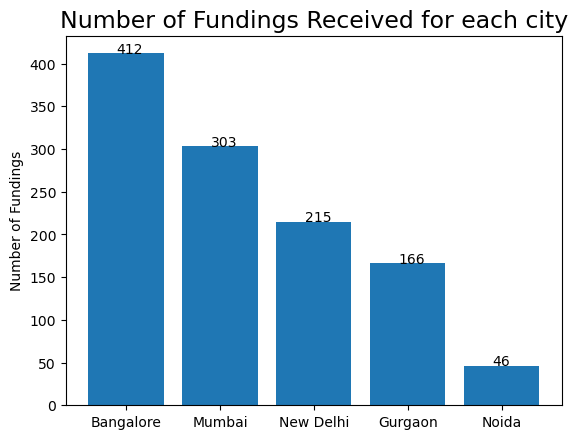

In [10]:
locations=['Bangalore','Mumbai','Gurgaon','Noida','New Delhi']
cities_no_of_fundings = df[df['CityLocation'].isin(locations)]['CityLocation']
fundings_data = cities_no_of_fundings.value_counts()

city_names = np.array(fundings_data.index)
no_of_fundings = np.array(fundings_data.values)

plt.bar(city_names, no_of_fundings)
plt.ylabel('Number of Fundings')
plt.title('Number of Fundings Received for each city',fontsize=17)
cell_values = []
for i in fundings_data.values:
    cell_values.append(str(i))
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i-.1,y[i]+.5,y[i])
addlabels(city_names, no_of_fundings)
plt.show()

## Bangalore City has received the most fundings so I would recommend Bangalore city to my friend to build his startup there

## 2.)
Even after trying for so many times, your friend’s startup could not find the investment. So you decided to take this matter in your hand and try to find the list of investors who probably can invest in your friend’s startup. Your list will increase the chance of your friend startup getting some initial investment by contacting these investors. Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). In a startup, multiple investors might have invested. So consider each investor for that startup. Ignore undisclosed investors.

In [11]:
df_new = data[data['InvestorsName'].notna()]
investors=[]
for row in df_new['InvestorsName']:
    for i in row.split(','):
        if 'undisclosed' not in i.lower() and i != "":
            investors.append(i.lower().strip())

In [41]:
dic=dict()
for i in investors:
    if i != "":
        dic[i]=dic.get(i,0)+1
investor_funding = pd.DataFrame(sorted(dic.items(), key=lambda kv:(kv[1], kv[0]),reverse=True),
                                columns=['Investor_Name','No_of_investments'])

In [38]:
seq = [i for i in set(investors) if 'quoia' in i]
print('Investors like sequoia - ')
print(seq)
print()
accel = [i for i in set(investors) if 'accel ' in i]
print('Investors like sequoia - accel')
print(accel)
print()
kalaari = [i for i in set(investors) if 'alaari ' in i]
print('Investors like sequoia - Kalaari')
print(kalaari)
print()
saif = [i for i in set(investors) if 'saif ' in i]
print('Investors like sequoia - Saif')
print(saif)
print()
Angel = [i for i in set(investors) if 'indian angel' in i]
print('Investors like sequoia - Indian')
print(Angel)

Investors like sequoia - 
['sequoia and kalaari capital.', 'sequoia capital.', 'sequoia capital india', 'sequoia capital global equities', 'sequoia capital', 'sequoia india', 'sequoia capital india advisors', 'sequoia capital india and omidyar network']

Investors like sequoia - accel
['accel partner', 'accel us', 'accel partners & others', 'accel partners', 'accel partners india', 'accel india', 'sands capital and accel partners', 'iifl and accel partners', 'accel partners rnt associates', 'google capital & accel partners', 'accel partners & existing investors']

Investors like sequoia - Kalaari
['sequoia and kalaari capital.', 'kalaari capital and inventus capital', 'kalaari capital partners', 'kalaari capital accelerator program', 'kalaari capital', 'kalaari capital and idg ventures india']

Investors like sequoia - Saif
['saif partners and others', 'saif partners.', 'saif partners & others', 'saif partners']

Investors like sequoia - Indian
['indian angel network (ian)', 'indian an

In [49]:
investor_funding.loc[investor_funding['Investor_Name'].str.contains('quoia') & ~investor_funding['Investor_Name'].str.contains('and'), 'Investor_Name'] = 'sequoia capital'
investor_funding.loc[investor_funding['Investor_Name'].str.contains('accel ') & ~investor_funding['Investor_Name'].str.contains('and'), 'Investor_Name'] = 'accel partners'
investor_funding.loc[investor_funding['Investor_Name'].str.contains('alaari ') & ~investor_funding['Investor_Name'].str.contains('and'), 'Investor_Name'] = 'kalaari capital'
investor_funding.loc[investor_funding['Investor_Name'].str.contains('saif') & ~investor_funding['Investor_Name'].str.contains('and'), 'Investor_Name'] = 'saif partners'
investor_funding.loc[investor_funding['Investor_Name'].str.contains('indian angel') & ~investor_funding['Investor_Name'].str.contains('and'), 'Investor_Name'] = 'indian angel network'


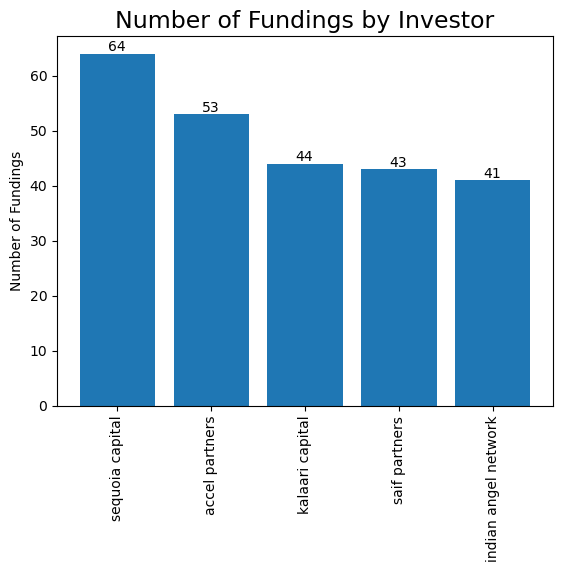

In [45]:

investor_names = np.array(investor_funding['Investor_Name'][:5])
no_of_fundings = np.array(investor_funding['No_of_investments'][:5])

plt.bar(investor_names, no_of_fundings)
plt.ylabel('Number of Fundings')
plt.title('Number of Fundings by Investor',fontsize=17)
plt.xticks(rotation=90)
cell_values = []
for i in no_of_fundings:
    cell_values.append(str(i))
addlabels(investor_names, no_of_fundings)
plt.show()

In [46]:
investor_funding

,Investor_Name,No_of_investments
0,sequoia capital,64
1,accel partners,53
2,kalaari capital,44
3,saif partners,43
4,indian angel network,41
...,...,...
2468,1crowd (through crowdfunding),1
2469,1crowd (through crowd funding),1
2470,122 west ventures,1
2471,& others,1


## 3.)
After re-analysing the dataset you found out that some investors have invested in the same startup at different number of funding rounds. So before finalising the previous list, you want to improvise it by finding the top 5 investors who have invested in different number of startups. This list will be more helpful than your previous list in finding the investment for your friend startup. Find the top 5 investors who have invested maximum number of times in different companies. That means, if one investor has invested multiple times in one startup, count one for that company. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [110]:
df_new = data[['InvestorsName','StartupName','InvestmentType']][data['InvestorsName'].notna() & data['InvestmentType'].notna()]

startups = df_new['StartupName'].unique()
ola = [k for k in startups if 'Ola' in k]

for i in ola:
    df_new['StartupName'].replace(i,"Ola",inplace=True)
df_new['StartupName'].replace('Flipkart.com',"Flipkart",inplace=True)

oyo = [k for k in startups if 'Oyo' in k]
for i in oyo:
    df_new['StartupName'].replace(i,"Oyo",inplace=True)
    
df_new['StartupName'].replace('Paytm Marketplace',"Paytm",inplace=True)


investors_data = pd.DataFrame(columns=['Investor_Name','StartupName'])


for row in df_new.index:
    for i in df_new['InvestorsName'][row].split(','):
        if 'undisclosed' not in i.lower():
            investors_data.loc[len(investors_data.index)] = [i.lower().strip(),df_new['StartupName'][row]]
            
investors_data.loc[investors_data['Investor_Name'].str.contains('quoia') & ~investors_data['Investor_Name'].str.contains('and'), 'Investor_Name'] = 'sequoia capital'
investors_data.loc[investors_data['Investor_Name'].str.contains('accel ') & ~investors_data['Investor_Name'].str.contains('and'), 'Investor_Name'] = 'accel partners'
investors_data.loc[investors_data['Investor_Name'].str.contains('alaari ') & ~investors_data['Investor_Name'].str.contains('and'), 'Investor_Name'] = 'kalaari capital'
investors_data.loc[investors_data['Investor_Name'].str.contains('saif') & ~investors_data['Investor_Name'].str.contains('and'), 'Investor_Name'] = 'saif partners'
investors_data.loc[investors_data['Investor_Name'].str.contains('indian angel') & ~investors_data['Investor_Name'].str.contains('and'), 'Investor_Name'] = 'indian angel network'

            
investors_data.head()

,Investor_Name,StartupName
0,kae capital,TouchKin
1,triton investment advisors,Ethinos
2,kashyap deorah,Leverage Edu
3,anand sankeshwar,Leverage Edu
4,deepak jain,Leverage Edu


In [111]:
print(investors_data.shape)

(4436, 2)


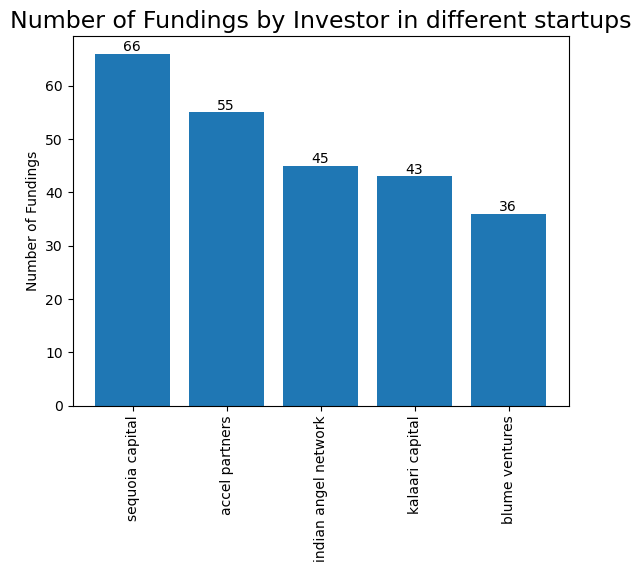

In [104]:
investors_data.drop_duplicates(keep='first', inplace=True)
dic=dict()
for i in investors_data['Investor_Name']:
    if i != "":
        dic[i]=dic.get(i,0)+1
    
investor_funding = pd.DataFrame(sorted(dic.items(), key=lambda kv:(kv[1], kv[0]),reverse=True)[:5],
                                columns=['Investor_Name','No_of_investments'])

investor_names = np.array(investor_funding['Investor_Name'])
no_of_fundings = np.array(investor_funding['No_of_investments'])

plt.bar(investor_names, no_of_fundings)
plt.ylabel('Number of Fundings')
plt.title('Number of Fundings by Investor in different startups',fontsize=17)
plt.xticks(rotation=90)
cell_values = []
for i in no_of_fundings:
    cell_values.append(str(i))
addlabels(investor_names, no_of_fundings)
plt.show()

## 4.)
Even after putting so much effort in finding the probable investors, it didn't turn out to be helpful for your friend. So you went to your investor friend to understand the situation better and your investor friend explained to you about the different Investment Types and their features. This new information will be helpful in finding the right investor. Since your friend startup is at an early stage startup, the best-suited investment type would be - Seed Funding and Crowdfunding. Find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [126]:
df_new['InvestmentType'].replace("PrivateEquity","Private Equity",inplace=True)
df_new['InvestmentType'].replace("SeedFunding","Seed Funding",inplace=True)
df_new['InvestmentType'].replace("Crowd funding","Crowd Funding",inplace=True)

investors_data_new = pd.DataFrame(columns=['Investor_Name','StartupName','Invest_type'])


for row in df_new.index:
    for i in df_new['InvestorsName'][row].split(','):
        if 'undisclosed' not in i.lower():
            investors_data_new.loc[len(investors_data_new.index)] = [i.lower().strip(),df_new['StartupName'][row],df_new['InvestmentType'][row]]
            
investors_data_new.loc[investors_data_new['Investor_Name'].str.contains('quoia') & ~investors_data_new['Investor_Name'].str.contains('and'), 'Investor_Name'] = 'sequoia capital'
investors_data_new.loc[investors_data_new['Investor_Name'].str.contains('accel ') & ~investors_data_new['Investor_Name'].str.contains('and'), 'Investor_Name'] = 'accel partners'
investors_data_new.loc[investors_data_new['Investor_Name'].str.contains('alaari ') & ~investors_data_new['Investor_Name'].str.contains('and'), 'Investor_Name'] = 'kalaari capital'
investors_data_new.loc[investors_data_new['Investor_Name'].str.contains('saif') & ~investors_data_new['Investor_Name'].str.contains('and'), 'Investor_Name'] = 'saif partners'
investors_data_new.loc[investors_data_new['Investor_Name'].str.contains('indian angel') & ~investors_data_new['Investor_Name'].str.contains('and'), 'Investor_Name'] = 'indian angel network'

            
investors_data_new.head()

,Investor_Name,StartupName,Invest_type
0,kae capital,TouchKin,Private Equity
1,triton investment advisors,Ethinos,Private Equity
2,kashyap deorah,Leverage Edu,Seed Funding
3,anand sankeshwar,Leverage Edu,Seed Funding
4,deepak jain,Leverage Edu,Seed Funding


In [127]:
investors_data_new.shape

(4436, 3)

In [128]:
investors_data_new_seed_crowd = investors_data_new[investors_data_new['Invest_type'].isin(["Seed Funding","Crowd Funding"])][['Investor_Name','StartupName']]
print(investors_data_new_seed_crowd.shape)
investors_data_new_seed_crowd.head()

(2366, 2)


,Investor_Name,StartupName
2,kashyap deorah,Leverage Edu
3,anand sankeshwar,Leverage Edu
4,deepak jain,Leverage Edu
5,sadashiva nt,Leverage Edu
6,arjun mehta,Leverage Edu


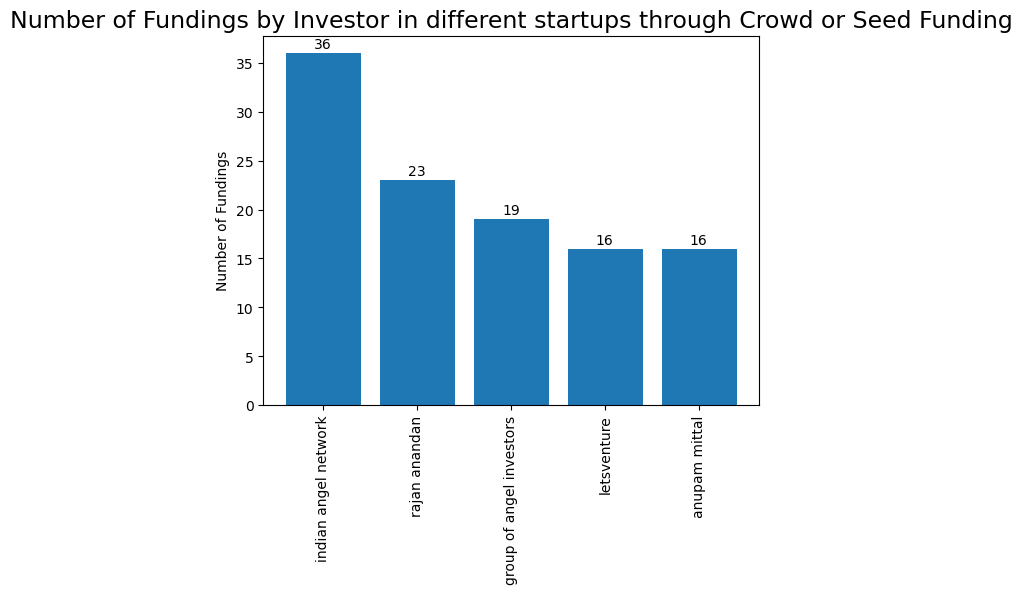

In [135]:

investors_data_new_seed_crowd.drop_duplicates(keep='first', inplace=True)
dic=dict()
for i in investors_data_new_seed_crowd['Investor_Name']:
    if i != "":
        dic[i]=dic.get(i,0)+1
    
investor_funding = pd.DataFrame(sorted(dic.items(), key=lambda kv:(kv[1], kv[0]),reverse=True)[:5],
                                columns=['Investor_Name','No_of_investments'])

investor_names = np.array(investor_funding['Investor_Name'])
no_of_fundings = np.array(investor_funding['No_of_investments'])

plt.bar(investor_names, no_of_fundings)
plt.ylabel('Number of Fundings')
plt.title('Number of Fundings by Investor in different startups through Crowd or Seed Funding',fontsize=17)
plt.xticks(rotation=90)
cell_values = []
for i in no_of_fundings:
    cell_values.append(str(i))
addlabels(investor_names, no_of_fundings)
plt.show()

## 5.)
Due to your immense help, your friend startup successfully got seed funding and it is on the operational mode. Now your friend wants to expand his startup and he is looking for new investors for his startup. Now you again come as a saviour to help your friend and want to create a list of probable new new investors. Before moving forward you remember your investor friend advice that finding the investors by analysing the investment type. Since your friend startup is not in early phase it is in growth stage so the best-suited investment type is Private Equity. Find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [132]:
investors_data_new_private_fund = investors_data_new[investors_data_new['Invest_type']=='Private Equity'][['Investor_Name','StartupName']]
print(investors_data_new_private_fund.shape)
investors_data_new_private_fund.head()

(2069, 2)


,Investor_Name,StartupName
0,kae capital,TouchKin
1,triton investment advisors,Ethinos
16,infuse ventures,Ecolibriumenergy
17,jll,Ecolibriumenergy
18,asset management (asia) ltd,Droom


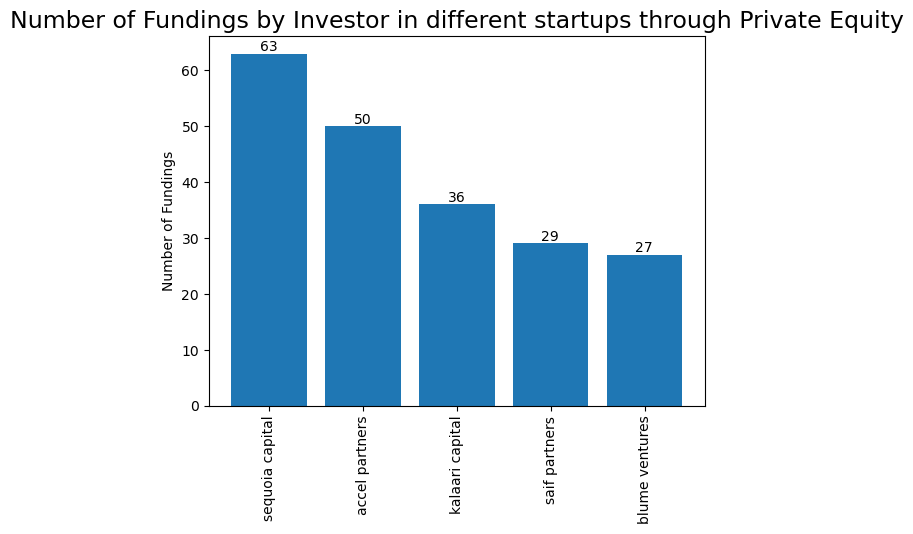

In [134]:

investors_data_new_private_fund.drop_duplicates(keep='first', inplace=True)
dic=dict()
for i in investors_data_new_private_fund['Investor_Name']:
    if i != "":
        dic[i]=dic.get(i,0)+1
    
investor_funding = pd.DataFrame(sorted(dic.items(), key=lambda kv:(kv[1], kv[0]),reverse=True)[:5],
                                columns=['Investor_Name','No_of_investments'])

investor_names = np.array(investor_funding['Investor_Name'])
no_of_fundings = np.array(investor_funding['No_of_investments'])

plt.bar(investor_names, no_of_fundings)
plt.ylabel('Number of Fundings')
plt.title('Number of Fundings by Investor in different startups through Private Equity',fontsize=17)
plt.xticks(rotation=90)
cell_values = []
for i in no_of_fundings:
    cell_values.append(str(i))
addlabels(investor_names, no_of_fundings)
plt.show()